In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
start=300
end=data.shape[0]-100

rawPrices = data["price"][start:end]
pricesMean = rawPrices.mean()
pricesStd = rawPrices.std()
rawAreas = data["area"][start:end]
areaMean = rawAreas.mean()
areaStd = rawAreas.std()


stdPrices = np.array((rawPrices-pricesMean)/pricesStd)
stdAreas = np.array((rawAreas-areaMean)/areaStd)


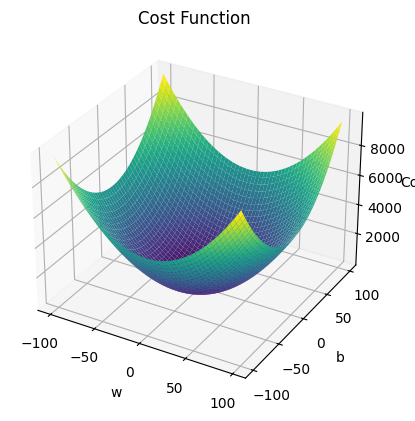

In [7]:
w = np.arange(-100,100)
b = np.arange(-100,100)

x = stdAreas
y = stdPrices
m = x.shape[0]

w_ , b_ = np.meshgrid(w,b)
cf = np.zeros(w_.shape)

for i in range(w.shape[0]):
    for j in range(w.shape[0]):
        cf[i][j] = (1/(2*m)) * np.sum((w_[i][j]*x+b_[i][j]-y)**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_, b_, cf, cmap="viridis")
ax.set_title("Cost Function")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("Cost")

# Show the plot
plt.show()

0.12712909707024123 2.819362038813218e-16


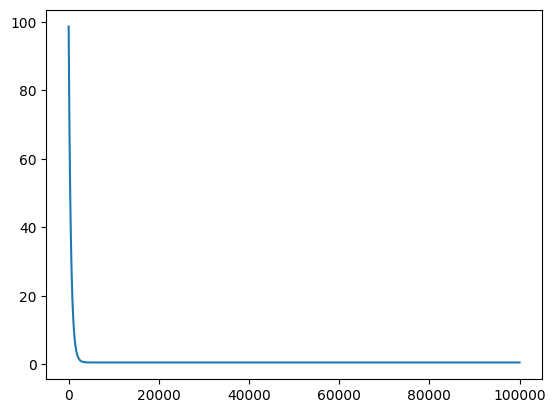

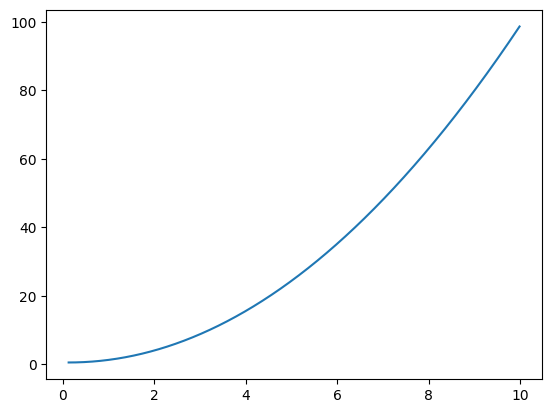

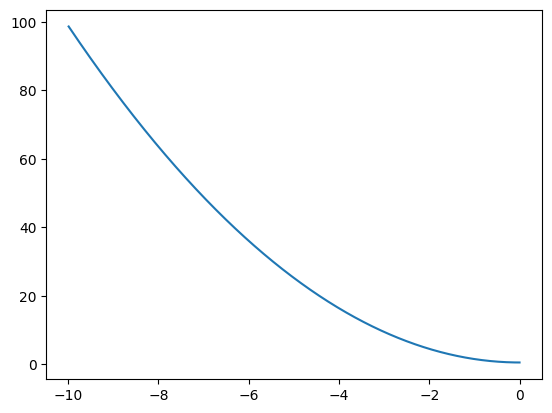

In [9]:
w = 10
b = -10

def gradientDescent(w,b,alp,x,y):
    m = len(x)
    
    dj_dw = (1/m)*np.sum(x*(w*x+b-y))
    dj_db = (1/m)*np.sum((w*x+b-y))

    w = w - alp * dj_dw
    b = b - alp * dj_db

    cf = (1/(2*m))*np.sum((w * x + b - y)**2)
    
    return cf,w,b

cfValues = []
w_values = []
b_values = []
for i in range(100000):
    cf,w,b = gradientDescent(w,b,0.001,stdAreas,stdPrices)
    cfValues.append(cf)
    w_values.append(w)
    b_values.append(b)

print(w,b)
plt.plot(np.arange(100000),cfValues)
plt.show()
plt.plot(w_values,cfValues)
plt.show()
plt.plot(b_values,cfValues)
plt.show()

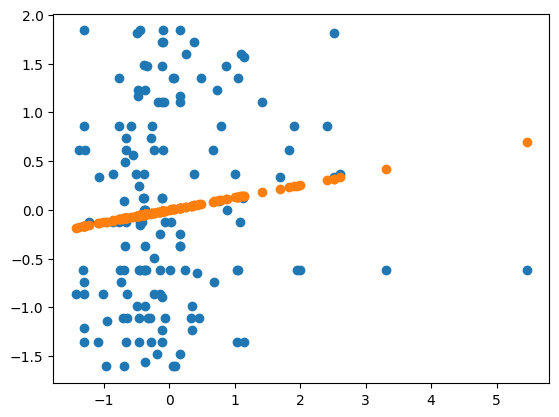

In [10]:
# plt.scatter(prices,area)
plt.scatter(stdAreas,stdPrices)
# b= 8
# w = 0.03
pr = w * stdAreas + b
plt.scatter(stdAreas,pr)


plt.show()
plt.show()

In [13]:

k=120
areaForTest = stdAreas[k]
priceForTest = rawPrices.iloc[k]


predictedPrice = (w * (areaForTest-areaMean)/areaStd + b)*pricesStd+pricesMean
print(predictedPrice,priceForTest)

3581100.928360615 3360000
